<html>
<head>
</head>
<body>
<h1>

Machine Learning For Humans</h1>
    <div class="col s12 m4 l2 card-panel">
           <img src ="img/codehunterslab.png" height="150" width="150" align ="left"/>
    </div>
</body>

</html>

## Titanic :
> El RMS(Royal Mail Ship) Titanic fue un transatlántico británico, el mayor barco del mundo al finalizar su construcción, que se hundió en la noche del 14 a la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. En el hundimiento del Titanic murieron 1514 personas de las 2223 que iban a bordo, lo que convierte a esta tragedia en uno de los mayores naufragios de la historia ocurridos en tiempos de paz.

<br>

<img src="img/giphy.webp" align="center"/>

### Descripción de los datos:

Variable | Definition | Key
--- | --- | ---
survival | Sobrevivio | 0 = No, 1 = Si
pclass|Ticket clase |1 = Primera Clase, 2 = Segunda Clase, 3 = Tercera Clase
sex |Género de cada pasajero |
Age|Edad | 10, 34.5, 20...
sibsp|# de Hermanos / Esposos a bordo del Titanic|
parch|# de parientes / # de Niños abordo del Titanic|
ticket|Número de ticket|
fare|Tarifa Pagada|
cabin|Número de Cabina|
embarked|Puerto de Embarque


### La Variable Objetivo(Target)
La variable a predecir del problema,  en este caso es la variable **Sobrevivio** el cual nos indica segunsu valor `1` si el pasajero llego a sobrevivir y `0` si el pasajero murio en la tragedia de Titanic.

### Librerias que utilizaremos
 - `pandas` para el manejo de base de datos, archivos de texto plano, tablas sql.
 - `numpy` para realizar operaciones entre vectores y matrices.
 - `seaborn` es una libreria para realizar visualizaciones de forma muy simple y practica.
 - `scikit-learn` libreria para el prepocesado de datos, y realizar el entranamiento de modelos de algoritmos de aprendizaje supervisado y no supervisado.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## ¿Como cargar un archivo separado por comas?
>Usaremos la funcion de pandas ***read_csv()**.

> Parámetros:
- file: define la ruta completa desde donde se cargara el archivo
- sep: el separador de columnas pueden ser comas ',', tabs'\t', espacios en blanco ' ' entre otros más.
- header: definimos la lista de nombres o dejamos que tome la primera fila como los nombres.
- index_col: definimos que columna usaremos como identificador, este debe ser único. Si no se define pandas definira un identificador correlativo en orden ascendente 1,2,3,4,5...

> Retorna:
* Un objeto pandas.core.frame.Dataframe

>Mayor información de los parámetros:
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

>Otras funciones similares:
- read_excel() -> archivos Excel(.xls  .xlsx)
- read_table() -> archivos de Text(.txt)



In [3]:
names_train = ["id_pasajero","sobrevivio","clase","nombre","genero","edad","ratio_hermanos","ratio_padres","ticket","tarifa_pagada","cabina","puerto_embarque"]
datatypes_train={'sobrevivio':'category','clase':'category','genero':'category','cabina':'category','puerto_embarque':'category'}

names_test =["id_pasajero","clase","nombre","genero","edad","ratio_hermanos","ratio_padres","ticket","tarifa_pagada","cabina","puerto_embarque"]
datatypes_test={'sobrevivio':'category','clase':'category','genero':'category','cabina':'category','puerto_embarque':'category'}


train = pd.read_csv("Datasets/titanic/train_titanic.csv", sep=",", header ='infer', index_col=0, names=names_train,skiprows =1,dtype=datatypes_train)
test = pd.read_csv("Datasets/titanic/test_titanic.csv", sep=",", header ='infer', index_col=0,names=names_test,skiprows =1,dtype=datatypes_test)

## ¿Como se estructura un Dataframe?
> Es una estructura de dos dimensiones que puede contener columnas de ddiferentes tipos(enteros, categoricos, texto).
Podemos hacer referencia a un dataframe como una hoja de datos de excel o una tabla SQL.


In [4]:
train.head(4)

,sobrevivio,clase,nombre,genero,edad,ratio_hermanos,ratio_padres,ticket,tarifa_pagada,cabina,puerto_embarque
id_pasajero,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


<img src = "img/dataframe.jpg"  height="700" width="700"/>

In [4]:
train.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='id_pasajero', length=891)

In [5]:
train.columns

Index(['sobrevivio', 'clase', 'nombre', 'genero', 'edad', 'ratio_hermanos',
       'ratio_padres', 'ticket', 'tarifa_pagada', 'cabina', 'puerto_embarque'],
      dtype='object')

### pandas.Series
is a one-dimensional labeled array capable of holding any data type 
(integers, strings, floating point numbers, Python objects, etc.).

In [6]:
train.edad.head()

id_pasajero
1    22.0
2    38.0
3    26.0
4    35.0
5    35.0
Name: edad, dtype: float64

In [7]:
type(train.edad)

pandas.core.series.Series

In [8]:
type(train.edad.values)

numpy.ndarray

In [9]:
train.edad.values[0:5]

array([22., 38., 26., 35., 35.])

## Exploratory Data Analysis

In [10]:
train.shape

(891, 11)

In [11]:
train.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
sobrevivio         891 non-null category
clase              891 non-null category
nombre             891 non-null object
genero             891 non-null category
edad               714 non-null float64
ratio_hermanos     891 non-null int64
ratio_padres       891 non-null int64
ticket             891 non-null object
tarifa_pagada      891 non-null float64
cabina             204 non-null category
puerto_embarque    889 non-null category
dtypes: category(5), float64(2), int64(2), object(2)
memory usage: 50.7+ KB


**`Dataframe.describe()`** devuelve un dataframe donde se calculan estadisticos descriptivos de los atributos.
>Parámetros:
 - percentiles: podemos especificar la lista de percentiles que queremos calcular  en una lista de la siguiente forma `[.10, .20, .25,.50]`
 - include: especificamos que tipo de columnas incluir(int8,int64, category, object), si no se especifica solo realiza calculos para las columnas cuyo tipo sea numerico., tambien se puede especificar `include='all'` para realizar el calculo a todas las columnas.
 - exclude: nos sirve para especificar a que tipo de columnas no incluir en el calculo de metricas.
> Retorna:
 - pandas.Dataframe compuesto por las siguientes filas:
     - `count:` conteo de todas las files con un valor diferente de nulo.
     - `mean:` el promedio de la columna.
     - `std:` la desviación estandar
     - `min:` el valor mínimo de la columna
     - `25%:` el percentil  25
     - `50%:` el percentil  25
     - `75%:` el percentil  25
     - `max:` el valor máximo de la columna
 
Más info ☻:
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

In [12]:
train.describe(include='all')

,sobrevivio,clase,nombre,genero,edad,ratio_hermanos,ratio_padres,ticket,tarifa_pagada,cabina,puerto_embarque
count,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,0,3,"Attalah, Miss. Malake",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Conteo Valores Nulos

In [5]:
vector_total = train.describe(include='all').loc['count',:] 
vector_total[vector_total<891]

edad               714
cabina             204
puerto_embarque    889
Name: count, dtype: object

#### Algunas observaciones:
* `edad, cabina y puerto_embarque` poseen valores nulos.
* `sobrevivio` es una atributo binario(posee dos clases 1 Sobrevivio, 0 No Sobrevivio)
* En el atributo `clase` existen tres tipos de ticket, de losc aules la clase 3 es la que se encuentra en mayor cantidad.
* En promedio la edad de los pasajeros era entre 20 y 33 años, cabe decir que habia personas de hasta 80 años.
* El atributo `edad` tiene 177 valores perdidos.
* el atributo `cabina` tiene 687 valores perdidos.
* el atributo `puerto_embarque` tiene 2 valores perdidos.


 - ¿porque no se tiene el registro de edad.? 
 - ¿Cual metodo seria el mas conveniente(mediana,media, estimacion)?
 - ¿de que grupos provienen estas personas?

<Figure size 2160x720 with 0 Axes>

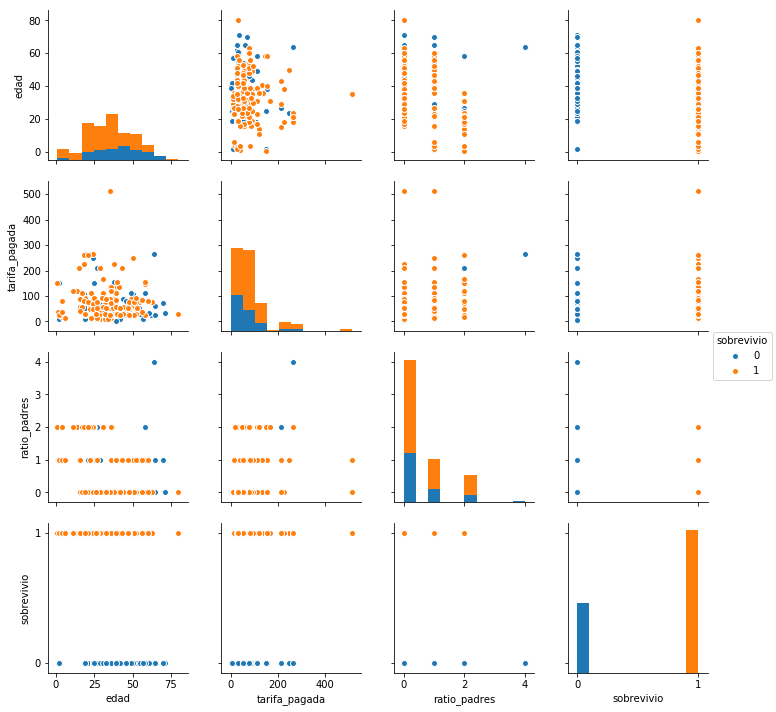

In [7]:
%matplotlib inline
train_num =train.drop("nombre", axis = 1).dropna()
plt.figure(figsize=(30,10))
g = sns.pairplot(train_num[["edad","tarifa_pagada","ratio_padres","sobrevivio"]], hue="sobrevivio")

Text(0.5,0,'conteo')

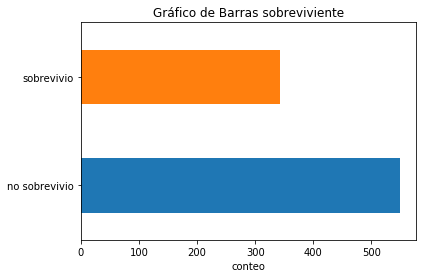

In [14]:
train.sobrevivio.value_counts().plot(kind="barh", title="Gráfico de Barras sobreviviente")
plt.yticks([1,0],["sobrevivio","no sobrevivio"])
plt.xlabel("conteo")


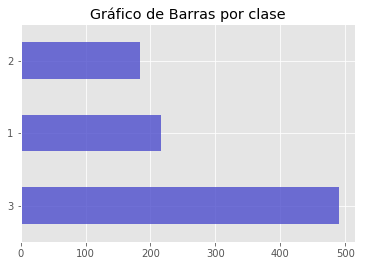

In [15]:
plt.style.use('ggplot')
train.clase.value_counts().plot(kind="barh", title="Gráfico de Barras por clase", color=(0.3,0.3,0.8,0.8))

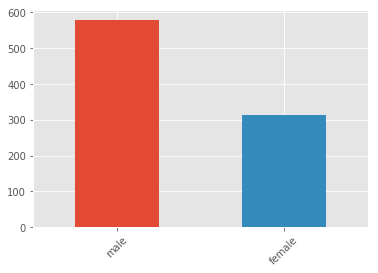

In [16]:
train.genero.value_counts().plot(kind ="bar", rot=45)

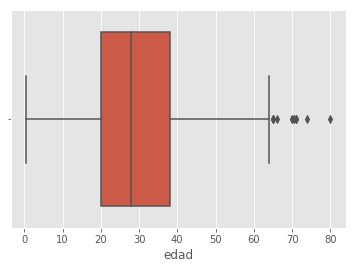

In [17]:
ax = sns.boxplot(x=train["edad"])


c:\users\gideon\desktop\cursos\codehunterslab\env_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


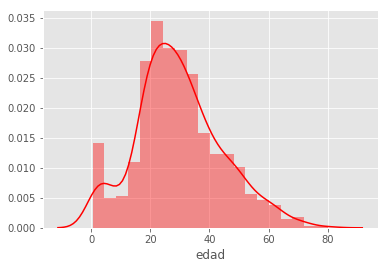

In [18]:
sns.distplot(train["edad"].dropna(), color="r")


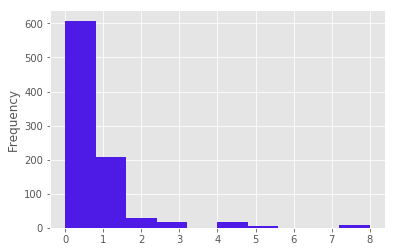

In [19]:
train["ratio_hermanos"].plot(color=(0.3,0.1,0.9), kind="hist")

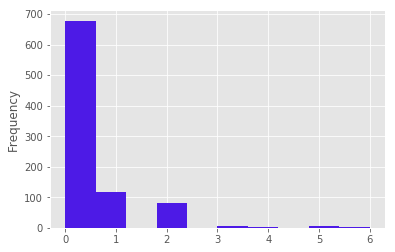

In [20]:
train["ratio_padres"].plot(color=(0.3,0.1,0.9), kind="hist")

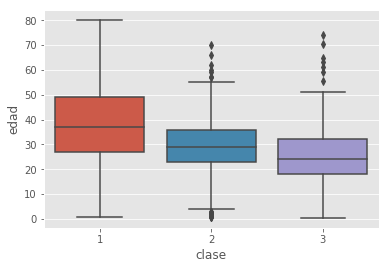

In [21]:
ax = sns.boxplot(x=train["clase"], y=train["edad"])

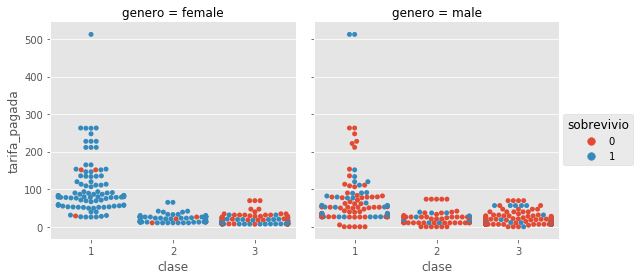

In [22]:
sns.factorplot(x="clase", y="tarifa_pagada", hue="sobrevivio",
               col="genero", data=train, kind="swarm");

In [23]:
train.corr()

,edad,ratio_hermanos,ratio_padres,tarifa_pagada
edad,1.000000,-0.308247,-0.189119,0.096067
ratio_hermanos,-0.308247,1.000000,0.414838,0.159651
ratio_padres,-0.189119,0.414838,1.000000,0.216225
tarifa_pagada,0.096067,0.159651,0.216225,1.000000


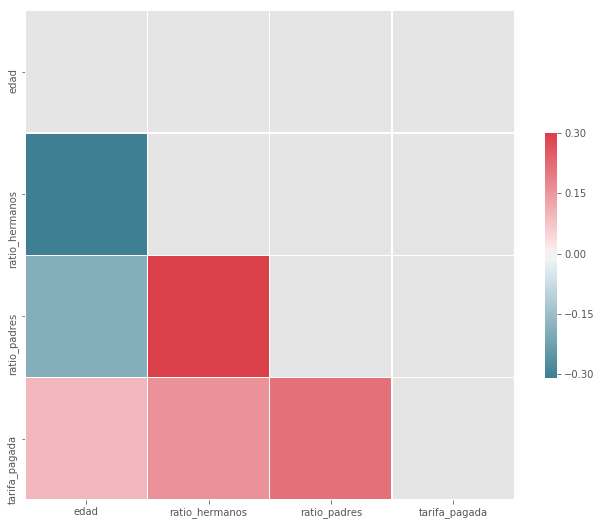

In [24]:
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask ,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

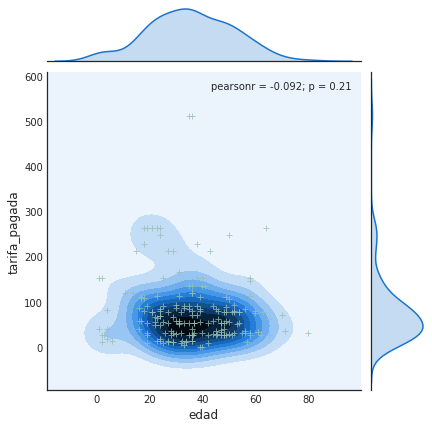

In [25]:
train_withoutna = train.dropna(axis=0)
with sns.axes_style("white"):
    g =sns.jointplot(x=train_withoutna.edad, y=train_withoutna.tarifa_pagada, kind="kde", color=(0.1,0.45,0.8));
    g.plot_joint(plt.scatter, color=(0.6,0.75,0.7, 0.75), s=30, linewidth=1, marker="+");


## Data Cleaning

## Feature Engineering

## Model 1 Random Forest

## Ensembled Methods